<h2>Advance calculus </h2>

In [2]:
import numpy as np
import sympy as smp
from sympy.vector import*
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec


In [3]:
x,y,z,u1,u2,u3,v1,v2,v3,t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')


<h2>Vectors and Geometry</h2>

<p> Numerical or Symbolic </p> 

In [4]:
a = np.array([1,2,3])
b = np.array([7,8,9])
u = smp.Matrix([u1, u2, u3])
v = smp.Matrix([v1, v2, v3])

In [5]:
uv

NameError: name 'uv' is not defined

<h2>Addition and  multiplication</h2>

In [ ]:
2*a+b

In [ ]:
2*u+v

<h2>Dot product</h2>


In [ ]:
np.dot(a,b)

In [ ]:
u.dot(v)

<h2>Cross product</h2>

In [ ]:
np.cross(a,b)

In [ ]:
u.cross(v)

<h2>Length of vector</h2>

In [ ]:
np.linalg.norm(a)

In [ ]:
u.norm()

<h2>Vector Projection</h2><hr><p>$proj_v(u) = \frac{\vec u \cdot \vec v}{|\vec v|^2} \vec v$</p>

In [ ]:
proj_b_a = np.dot(a,b)/np.linalg.norm(b)**2 *b
proj_b_a

In [ ]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

<h2>Lines/Planes in Space</h2>
<p>Lines: $\vec r(t) = \vec r_o + t \vec v$</p>

In [ ]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + v*t
r

<p>Planes: $ \vec n \cdot (P_o -<x,y,z>)=0$</p>

In [6]:
P0 = smp.Matrix([4,4,8])
r = smp.Matrix([x,y,z])
n = smp.Matrix([1,1,1])
n.dot(P0-r)

-x - y - z + 16

<p><b>Examples</b>Find vector parallel to the line of intersection of the two planes 3x-6y-2z=15 and 2x+y-2z=5(it's going to be perpendicular to both the normal vector of the intersection plane</p>


In [7]:
n1 = np.array([3,-6,-2])
n2 = np.array([2,1,-2])
ans = np.cross(n1,n2)
ans

array([14,  2, 15])

<h2>Vecor Calculus</h2>

<h3>Vector Derivatives </h3>

In [8]:
r = smp.Matrix([3*t,smp.sin(t),t**2])
r_d = smp.diff(r,t)
r_dd = smp.diff(r_d,t)
r_dd

Matrix([
[      0],
[-sin(t)],
[      2]])

<p><b>Example</p>Find the angle between the velocity and accleration as a function of time $\theta(t)$.</p>

<p>Angle between two vector:$\cos\theta = \frac{\vec v \cdot \vec u}{|\vec u \vec v|}$ </p>

In [9]:
cos_theta = r_d.dot(r_dd)/(r_d.norm()*r_dd.norm())
theta = smp.acos(cos_theta).simplify()
theta.subs(t,6).evalf()

0.251108015692338

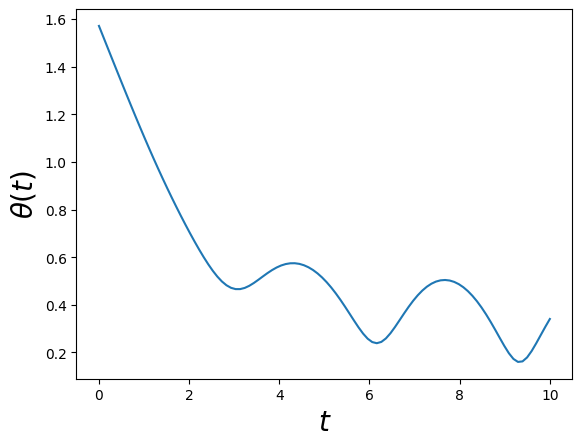

In [10]:
tt = np.linspace(0,10,100)
theta_f = smp.lambdify([t],theta)(tt)
plt.plot(tt,theta_f)
plt.xlabel('$t$',fontsize=20)
plt.ylabel(r'$\theta(t)$',fontsize=20)
plt.show()

<h2>Vector Integrals</h2>

<p>Note: Will not add the +C</p>

In [11]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

Matrix([
[exp(t)*cos(t)],
[         t**4],
[ 1/(t**2 + 1)]])

In [12]:
smp.integrate(r,t).doit()

Matrix([
[exp(t)*sin(t)/2 + exp(t)*cos(t)/2],
[                           t**5/5],
[                          atan(t)]])

<p> In some cases intergal cannot be evaluated symolically: must solve definite integrals numerically</p>

In [13]:
r = smp.Matrix([smp.exp(t**2)*smp.cos(t)**3, smp.exp(-t**4),1/(3+t**2)])
r

Matrix([
[exp(t**2)*cos(t)**3],
[         exp(-t**4)],
[       1/(t**2 + 3)]])

In [14]:
smp.integrate(r,t).doit()

Matrix([
[                Integral(exp(t**2)*cos(t)**3, t)],
[gamma(1/4)*lowergamma(1/4, t**4)/(16*gamma(5/4))],
[                     sqrt(3)*atan(sqrt(3)*t/3)/3]])

<p>Integrate from t=0 to t=4</p>

In [15]:
r_num = smp.lambdify(t,r)
r_num(0)

array([[1.        ],
       [1.        ],
       [0.33333333]])

In [16]:
quad_vec(r_num,0,4)[0]

array([[-4.83559254e+05],
       [ 9.06402477e-01],
       [ 6.70972506e-01]])

<h2>Arc length</p>

$$ L = \int_{a}^{b} \sqrt{dx^2+dy^2+dz^2}$$
$$ L = \int_{a}^{b} \sqrt{\left (\frac{dx}{dt} \right)^2+\left( \frac{dy}{dt}\right)^2+ \left (\frac{dz}{dt}\right)^2} dt$$

<p>Rare cases can be done symbolically.find arclength of $<{0,t,t^2}>$ from t= 0 to t=1</p>

In [28]:
smp.integrate(smp.diff(smp.Matrix([0,t,t**2]),t).norm(),(t,0,1)).n()

1.47894285754460

In [26]:
smp.diff(smp.Matrix([0,t,t**2])).norm()

sqrt(4*Abs(t)**2 + 1)

<p>In most cases needs to be done numerically. find arclength of $<e^t,\sin(t),t^4>$4 from t =0 to t=1</p>

In [34]:
smp.integrate(smp.diff(smp.Matrix([smp.exp(t),smp.sin(t),t**4]),t).norm(),(t,0,1)).n()

2.31697714644486

In [39]:
r = smp.Matrix([smp.exp(t),smp.sin(t),t**4])
r_dnum = smp.lambdify(t,smp.diff(r,t).norm())
quad(r_dnum,0,1)[0]

2.316977146444862

<h2>Other relavent Quantities</h2>
<p>if $ds=\sqrt{dx^2+dy^2+dz^2}$ is the acrlength element $\frac{ds}{dt}=\sqrt{\left (\frac{dx}{dt} \right)^2+\left( \frac{dy}{dt}\right)^2+ \left (\frac{dz}{dt}\right)^2}$</p>
<hr> <p>Unit Tangent vector: $\vec T = \frac{d\vec r}{dt}\frac{1}{|\frac{d\vec r}{dt}|}$</p>
<p>Curvature:$\kappa = |\frac{d \vec T}{dt}|\frac{1}{|\vec v|}$</p>
<p>Unit normal vector to the curve: $\vec N = \frac{\frac{d\vec T}{dt}}{|\frac{d\vec T }{dt}|}$</p>

<p><b>Example</b> Find all these for $\vec r(t) = <a\cos(t)e^t,b\sin(t),ct>$</p>

In [40]:
t,a,b,c = smp.symbols('t a b c', pos=True, real=True)

In [45]:
r = smp.Matrix([a*smp.cos(t)*smp.exp(t),b*smp.sin(t),c*t])
r_d = smp.diff(r,t)
T = r_d * 1/r_d.norm()
T

Matrix([
[(-a*exp(t)*sin(t) + a*exp(t)*cos(t))/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
[                            b*cos(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
[                                   c/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)]])

In [47]:
T_d = smp.diff(T,t)
T_d

Matrix([
[-2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) + (-a*exp(t)*sin(t) + a*exp(t)*cos(t))*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2)],
[                                      b*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2) - b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)],
[                                                                                                                             c*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2)]])

In [49]:
k = T_d.norm()*1/r_d.norm()
k

sqrt(c**2*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))**2/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**3 + Abs(2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) - (a*exp(t)*sin(t) - a*exp(t)*cos(t))*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))**2 + Abs(b*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2) + b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2))**2)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)

In [50]:
N = T_d/T_d.norm()
N

Matrix([
[(-2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) + (-a*exp(t)*sin(t) + a*exp(t)*cos(t))*(-2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) + b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))/sqrt(c**2*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))**2/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**3 + Abs(2*a*exp(t)*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2) - (a*exp(t)*sin(t) - a*exp(t)*cos(t))*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2))**2 + Abs(b*(2*a*(a*exp(t)*sin(t) - a*exp(t)*cos(t))*exp(t)*sin(t) - b**2*sin(t)*cos(t))*cos(t)/(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)**(3/2) + b*sin(t)/sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2))**2)],
[                 

<p>Can evaluate these quantities or make plots</p>

In [52]:
k.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

0.00775458595406284

In [55]:
N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf()

Matrix([
[-0.152946073876551],
[-0.204518432770271],
[-0.966840063890063]])

<p>can also make continous plots</p>

In [57]:
k_num = smp.lambdify([t,a,b,c],k)


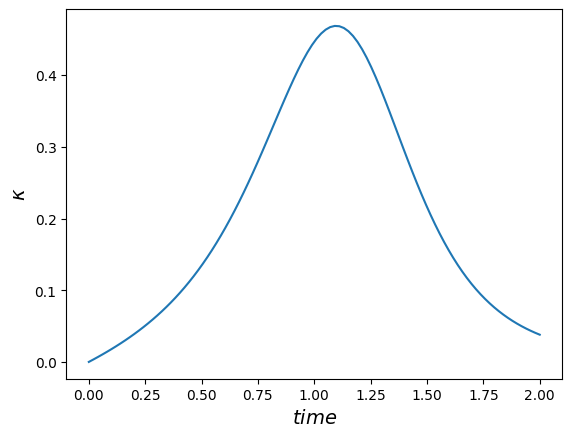

In [62]:
tt = np.linspace(0,2,100)
kk = k_num(tt,1,2,3)
fig,ax = plt.subplots()
ax.plot(tt,kk)
ax.set_ylabel(r'$\kappa$',fontsize=14)
ax.set_xlabel(r'$time$',fontsize=14)
plt.show()

<h2>Partial/Directional Derivaties</h2>

In [64]:
x,y,z = smp.symbols('x y z')

<h2>Basic</h2><p>Partial Derivaties $\frac{\partial f}{\partial x}$ ,$\frac{\partial^3 f}{\partial x \partial y^2}$and $\frac{\partial f}{\partial y}$ of $ f(x,y)= y^2 \sin(x+y)$</p>

In [65]:
f = y**2*smp.sin(x+y)
smp.diff(f,x)

y**2*cos(x + y)

In [66]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

In [68]:
smp.diff(f,x,y,y)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

<h2>The chain Rule</h2>

In [72]:
t = smp.symbols('t')
x,y,z,w,v = smp.symbols('x y z w v', cls=smp.Function)



<p>Suppose $x,y$ and $z$ are function of $ t$</p>
<p>$w$ is a function of $x,y,z $ and $z$ i.e $w= w(x,y,z)$</p>
<p>find $\frac{dw}{dt}$</p>

In [73]:
x = x(t)
y = y(t)
z = z(t)
w = w(x,y,z)



<p>Can keep things in a more functional forms</p>

In [74]:
smp.diff(w,t)

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

Or put in specific functions

In [84]:
w1 = x**2 + smp.exp(y)*smp.sin(z)
smp.diff(w1,t).subs([(x,smp.sin(t)),(y,smp.cos(t)),(z,t**2)]).doit()

2*t*exp(cos(t))*cos(t**2) - exp(cos(t))*sin(t)*sin(t**2) + 2*sin(t)*cos(t)

<h2>Gradients</h2><p>Gradients: $\nabla f$. Now we are dealing with particular coordinate systems, so we must be careful:</p>

In [92]:
C = CoordSys3D('')
f = C.x*smp.sin(C.y)
gradient(f)

(sin(.y))*.i + (.x*cos(.y))*.j

In [91]:
f

.x*sin(.y)

In [93]:
gradient(f).to_matrix(C)

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

In [95]:
gradient(f).to_matrix(C).subs([(C.y,1)])

Matrix([
[   sin(1)],
[.x*cos(1)],
[        0]])

<h2>Directional Derivatives</h2>
<p>Directional derivatives $D_u f = \nabla f \cdot \hat u$</p>

In [96]:
u = 4*C.i - 3*C.j + 2*C.k

In [97]:
u

4*.i + (-3)*.j + 2*.k

In [100]:
unit_u = u.normalize()

In [101]:
unit_u

(4*sqrt(29)/29)*.i + (-3*sqrt(29)/29)*.j + (2*sqrt(29)/29)*.k

In [102]:
gradient(f).dot(unit_u)

-3*sqrt(29)*.x*cos(.y)/29 + 4*sqrt(29)*sin(.y)/29